In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
#We do not want to see warnings
warnings.filterwarnings("ignore") 

In [2]:
#import data
data = pd.read_csv("uber.csv")

In [3]:
#Create a data copy
df = data.copy()

In [4]:
#Print data
df.head

<bound method NDFrame.head of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC      

In [5]:
#Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
#pickup_datetime is not in required data format
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [8]:
#Statistics of data
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [9]:
#Number of missing values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
df.drop(['key', 'Unnamed: 0'],axis = 1,inplace=True)

In [11]:
df2=df.drop(["pickup_datetime"],axis = 1)

In [12]:
df2

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [13]:
#Correlation
df2.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010457,-0.008481,0.008986,-0.011014,0.010150
pickup_longitude,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414
pickup_latitude,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010150,-0.000414,-0.001560,0.000033,-0.000659,1.000000


<Axes: >

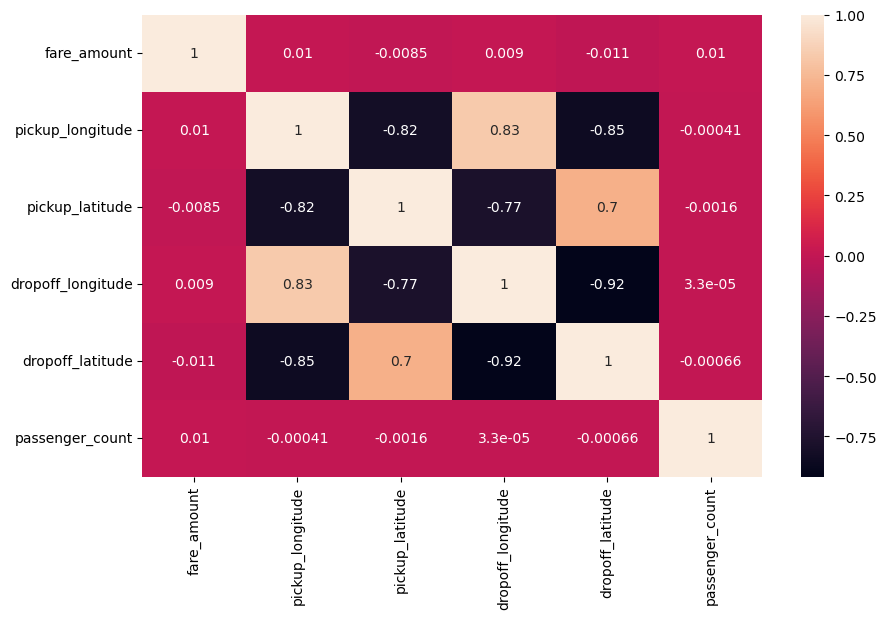

In [14]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df2.corr(),annot = True)

In [15]:
#Drop the rows with missing values
df.dropna(inplace=True)

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

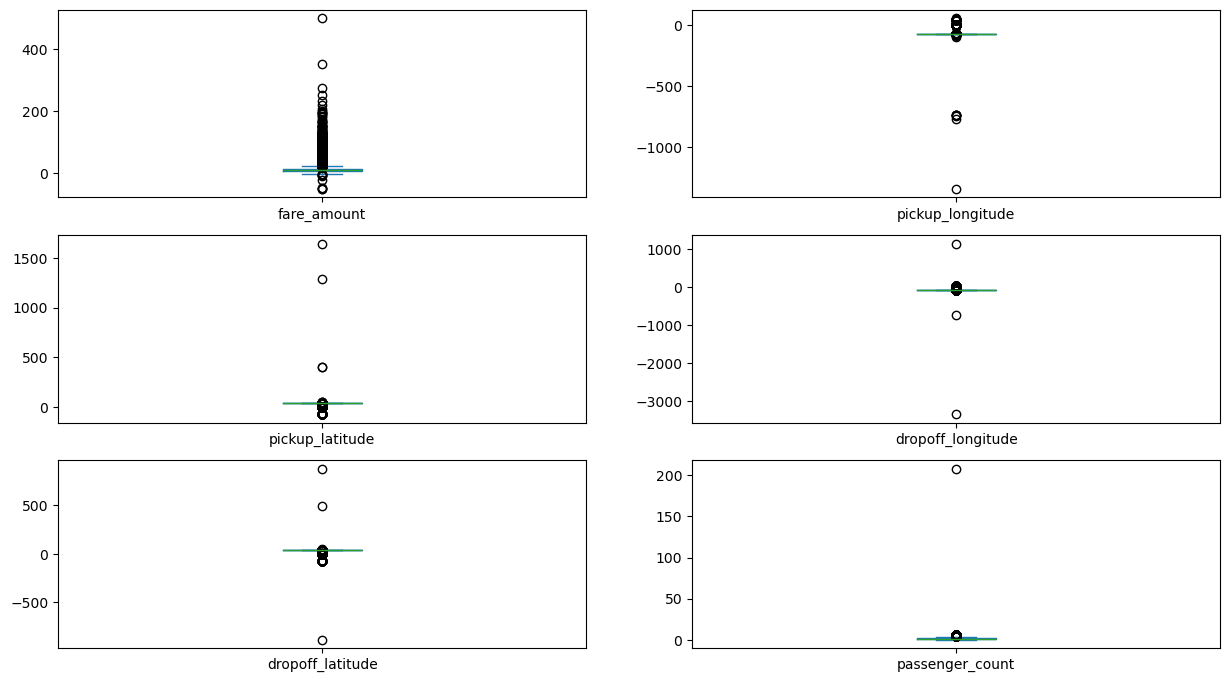

In [16]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
dtype: object

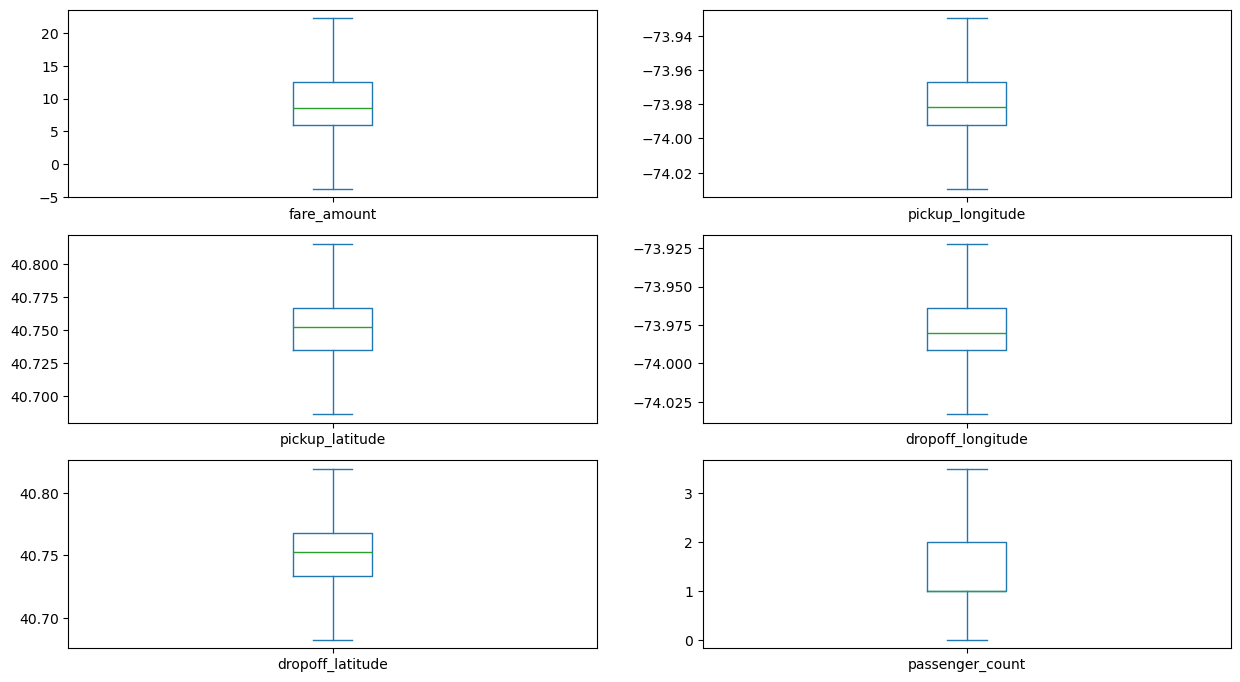

In [17]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1
def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

df = treat_outliers_all(df , df.iloc[: , 0::])
    
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

In [18]:
#Check the missing values now
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [19]:
#Time to apply learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
datatime_column = df['pickup_datetime']
df.drop('pickup_datetime', axis=1, inplace=True)

# Scale the DataFrame without the datetime column
standard_scaler = StandardScaler()
df_scaled_array = standard_scaler.fit_transform(df)

# Convert the scaled array back to a DataFrame
df_scaled = pd.DataFrame(df_scaled_array, columns=df.columns)

# Add the pickup_datetime column back
df_scaled['pickup_datetime'] = datatime_column.reset_index(drop=True)

In [21]:
#Take x as predictor variable
x = df_scaled.drop("fare_amount", axis = 1)
#And y as target variable
y = df_scaled['fare_amount']


In [22]:
#Necessary to apply model
x['pickup_datetime'] = pd.to_numeric(pd.to_datetime(x['pickup_datetime']))

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lrmodel = LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [26]:
#Prediction
predict = lrmodel.predict(x_test)

In [27]:
#Check Error
from sklearn.metrics import mean_squared_error , r2_score
lrmodelrmse = np.sqrt(mean_squared_error(y_test,predict))
r2 = r2_score(y_test,predict)
print("RMSE error for the model is ", lrmodelrmse)
print("R2 score for the model is ", r2)

RMSE error for the model is  0.9898015187984787
R2 error for the model is  0.02179775275433049


In [28]:
#Let's Apply Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)

In [29]:
#Fit the Forest
rfrmodel.fit(x_train, y_train)
rfrmodel_pred = rfrmodel.predict(x_test)

In [30]:
#Errors for the forest
rfrmodel_rmse = np.sqrt(mean_squared_error(y_test , rfrmodel_pred))
rf_r2 = r2_score(y_test,rfrmodel_pred)
print("RMSE value for Random Forest is:",rfrmodel_rmse)
print("R2 score for the model is ", rf_r2)

RMSE value for Random Forest is: 0.47121294088487836
R2 error for the model is  0.7782994133476595
